## Demo of the contribution submitted at LEG workshop at ECML-PKDD 2019
This notebook allows to easily test the method introduced in the article:

`Detecting Stable Communities in Link Streams at Multiple Temporal Scales`

Authors: `Souâad Boudebza, Rémy Cazabet, Omar Nouali, Faiçal Azouaou`

### `tnetwork` library installation
The code is built on a custom library, that must be first installed using `pip`.
If you're running this code online, you probably need to execute the command in the next cell.
The documentation of this library can be found at: http://tnetwork.readthedocs.io/

In [1]:
!pip install --upgrade git+https://github.com/Yquetzal/tnetwork.git

  Cloning https://github.com/Yquetzal/tnetwork.git to /tmp/pip-req-build-avpacxvn
  Running command git clone -q https://github.com/Yquetzal/tnetwork.git /tmp/pip-req-build-avpacxvn
     |████████████████████████████████| 2.8 MB 8.3 MB/s 
  Created wheel for tnetwork: filename=tnetwork-1.1-py3-none-any.whl size=53297195 sha256=4b7dbb7e81154b103f72a9f5df199ecae533faa9f7c4b8ecc30e08e23ff7a2a0
  Stored in directory: /tmp/pip-ephem-wheel-cache-yr0sx51y/wheels/93/6b/b2/b4fc19dbf6f472bd272d78185b279e4becead8111b53934f8a
Successfully built tnetwork


### We can now import a set of useful libraries

In [2]:
import tnetwork as tn
import networkx as nx
import numpy as np
from bokeh.io import show, output_notebook, output_file, reset_output
from bokeh.layouts import row
from tnetwork.DCD.analytics.NMIs import NMI

We finally import the methods introduced in the article. Note that their code is integrated in the tnetwork library, but also availale as stand-alones on the same git repository as this file

In [3]:
# Our proposed method: Multiple Temporal Scale Stable Community Detection method
from tnetwork.DCD import MSSCD  
#Generator
from tnetwork.DCD.multi_temporal_scale import generate_multi_temporal_scale

## Generate a random graph with multiple temporal scale communities


In [4]:
T=1000
N= 50
SC=5
#return the generated dynamic graph and the discovered communities
generated_graph,original_coms = generate_multi_temporal_scale(nb_steps=T,nb_nodes=N,nb_com = SC)

## Plot the communities to discover
Each horizontal position corresponds to a node, color lines represent communities

* /!\ In the google colab notebook, one cannot open plots in new windows, so we use `output_notebook` and not `output_file`, to display the plots inline. This might slow down the notebook.

/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


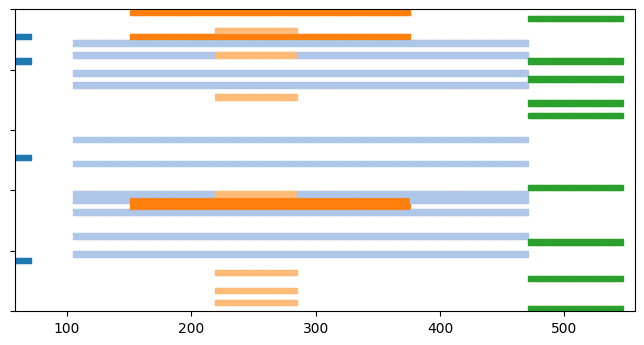

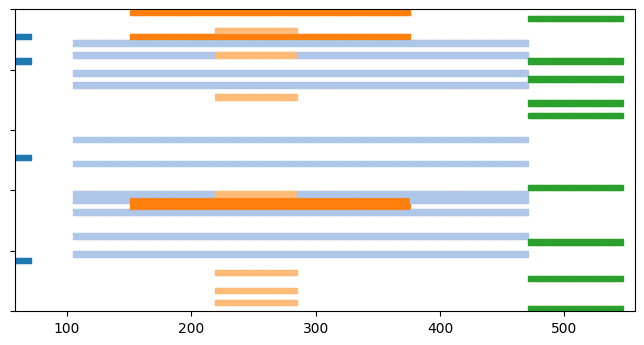

In [8]:

#define the order in which to display nodes
node_order=[str(x) for x in range(N)]
tn.plot_longitudinal(tn.DynGraphSN(),original_coms,nodes=node_order,height=400)


## Detect stable communities using the proposed algorithm

In [9]:
#we re-state default parameters:
theta_gamma = 1 #minimum temporal scale to consider
theta_q = 0.7 #minimum quality
theta_s = 0.3 #maximum similarity to be considered different
theta_p = 3 #nb consecutive steps to be considered persistant

persistant_coms = MSSCD(generated_graph,t_persistance=theta_p,t_quality=theta_q,t_similarity=theta_s)

N/A% (0 of 3) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing
------- granularity (gamma):  333  |  # good seeds:  0 # persistent communities found (total):  0


N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing
------- granularity (gamma):  166  |  # good seeds:  5 # persistent communities found (total):  0


N/A% (0 of 13) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


 53% (7 of 13) |#############            | Elapsed Time: 0:00:00 ETA:  00:00:00

------- granularity (gamma):  83  |  # good seeds:  5 # persistent communities found (total):  0


N/A% (0 of 25) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


 84% (21 of 25) |####################    | Elapsed Time: 0:00:00 ETA:   0:00:00

------- granularity (gamma):  41  |  # good seeds:  7 # persistent communities found (total):  2


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

------- granularity (gamma):  20  |  # good seeds:  21 # persistent communities found (total):  3
starting no_smoothing


N/A% (0 of 200) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

------- granularity (gamma):  10  |  # good seeds:  27 # persistent communities found (total):  4
starting no_smoothing


 94% (188 of 200) |####################  | Elapsed Time: 0:00:00 ETA:   0:00:00

------- granularity (gamma):  5  |  # good seeds:  40 # persistent communities found (total):  4


N/A% (0 of 500) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


100% (500 of 500) |######################| Elapsed Time: 0:00:01 ETA:  00:00:00

------- granularity (gamma):  2  |  # good seeds:  50 # persistent communities found (total):  4


We can now plot found communities, using the same function as previously

/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


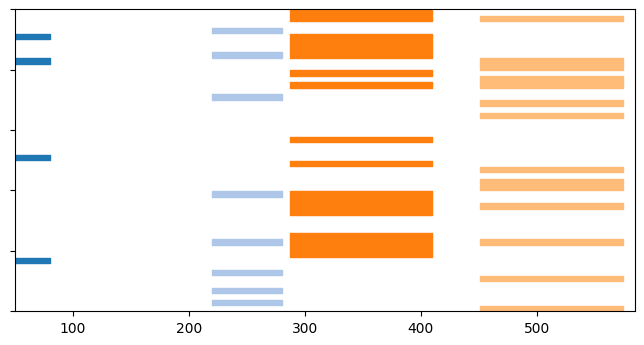

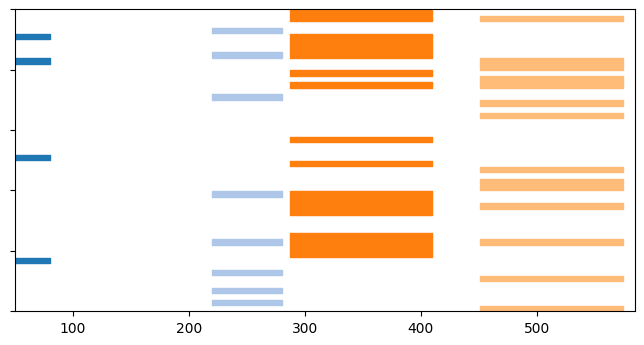

In [10]:
found_stable_communities = persistant_coms
tn.plot_longitudinal(tn.DynGraphIG(),found_stable_communities,nodes=node_order,height=400)


## Compute NMI at each step
We compute the NMI between the plnated communities and: i) our communities ii) communities found by another dynamic community detection algorithm (`Tracking the evolution of communities in dynamic social networks`, `Greene et al. 2010`)

In [11]:
#detect communities according to the other solution. We first aggregate the graph at the desired granularity

#aggregate the graph at the desired granularity
granularity = 13
aggregated = generated_graph.aggregate_sliding_window(granularity)

#compute communities
baseline_communities = tn.DCD.iterative_match(aggregated).to_DynCommunitiesIG(sn_duration=granularity)

N/A% (0 of 77) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


 96% (74 of 77) |####################### | Elapsed Time: 0:00:00 ETA:   0:00:00

In [29]:
NMIs_found = []
NMI_baseline = []
for t in range(T):
    g = generated_graph.snapshots(t)
    #get the community structure at that step
    if t in original_coms.snapshot_communities():
      GT_com_t = list(original_coms.communities(t).values())
    else:
      GT_com_t={}
    
    #we compute NMI only when there are communities 
    #(actually favorizing the baseline, that find communities even when there aren't)
    if len(GT_com_t)>0: 
        found_com_t = list(found_stable_communities.communities(t).values())
        baseline_com_t = list(baseline_communities.communities(t).values())

        #compute NMIs
        nodes_at_t = g.nodes
        NMIs_found.append( NMI(GT_com_t,found_com_t,allNodes=nodes_at_t))
        NMI_baseline.append(NMI(GT_com_t,baseline_com_t,allNodes=nodes_at_t))

### Compute NMIs

In [30]:
print("NMI for cumulated: ",np.average(NMI_baseline))
print("NMI for proposed solution: ",np.average(NMIs_found))

NMI for cumulated:  0.2331474357449678
NMI for proposed solution:  0.31589447936071047


# Real Network Analysis (SocioPatterns)

### Loading the dataset
The studied dataset is included into the tnetwork library

In [31]:
primary_school = tn.graph_socioPatterns_Primary_School(tn.DynGraphSN)

graph will be loaded as:  <class 'tnetwork.dyn_graph.dyn_graph_sn.DynGraphSN'>


In [32]:
classes = tn.utils.community_utils.read_socioPatterns_Primary_School_com()
classes = {int(k):v for k,v in classes.items()}

### Cleaning
We start by removing nodes not belonging to chosen classes

In [33]:
node_activity = {k:len(p) for k,p in primary_school.node_presence().items()}
to_remove={n for n,v in node_activity.items() if classes[n] not in {"1B","2B","3B","5B"}}
results = primary_school.apply_nx_function(nx.Graph.remove_nodes_from,nodes=to_remove)

We also defined an ordering of nodes, based on classes

In [34]:
ordered_nodes = sorted([(n,cl) for n,cl in classes.items()],key=lambda x:x[1])
ordered_nodes = [x[0] for x in ordered_nodes if not x[0] in to_remove]


We can now compute stable communities. We let the default parameters, but for the granularity limit, since 20s is 
the rate at which data are collected for this dataset. Note that in the dataset, dates of interaction is represented as timestamps,
therefore in term of number of seconds since origin.

In [35]:
persistant_coms_school = MSSCD(primary_school,t_granularity=20)

N/A% (0 of 3) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


 33% (1 of 3) |########                  | Elapsed Time: 0:00:00 ETA:  00:00:00

------- granularity (gamma):  38966  |  # good seeds:  0 # persistent communities found (total):  0


N/A% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


 40% (2 of 5) |##########                | Elapsed Time: 0:00:00 ETA:  00:00:00

------- granularity (gamma):  19483  |  # good seeds:  13 # persistent communities found (total):  1


N/A% (0 of 9) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


 66% (6 of 9) |#################         | Elapsed Time: 0:00:00 ETA:   0:00:00

------- granularity (gamma):  9741  |  # good seeds:  29 # persistent communities found (total):  2


N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


 66% (10 of 15) |################        | Elapsed Time: 0:00:00 ETA:   0:00:00

------- granularity (gamma):  4870  |  # good seeds:  54 # persistent communities found (total):  3


N/A% (0 of 27) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


 81% (22 of 27) |###################     | Elapsed Time: 0:00:00 ETA:   0:00:00

------- granularity (gamma):  2435  |  # good seeds:  96 # persistent communities found (total):  6


N/A% (0 of 53) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


 92% (49 of 53) |######################  | Elapsed Time: 0:00:00 ETA:   0:00:00

------- granularity (gamma):  1217  |  # good seeds:  180 # persistent communities found (total):  8


N/A% (0 of 104) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


 99% (103 of 104) |##################### | Elapsed Time: 0:00:01 ETA:   0:00:00

------- granularity (gamma):  608  |  # good seeds:  325 # persistent communities found (total):  17


N/A% (0 of 206) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


 99% (204 of 206) |##################### | Elapsed Time: 0:00:03 ETA:   0:00:00

------- granularity (gamma):  304  |  # good seeds:  569 # persistent communities found (total):  29


N/A% (0 of 410) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


 96% (395 of 410) |##################### | Elapsed Time: 0:00:01 ETA:   0:00:00

------- granularity (gamma):  152  |  # good seeds:  932 # persistent communities found (total):  48


N/A% (0 of 817) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


 97% (797 of 817) |##################### | Elapsed Time: 0:00:03 ETA:   0:00:00

------- granularity (gamma):  76  |  # good seeds:  1419 # persistent communities found (total):  62


N/A% (0 of 1632) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


 98% (1612 of 1632) |################### | Elapsed Time: 0:00:04 ETA:   0:00:00

------- granularity (gamma):  38  |  # good seeds:  1782 # persistent communities found (total):  91


# Plotting the found communities
### We start by plotting communities of duration more than 2 hours
Note that unlike in the article, here, we do not filter on a single day. One can filter using the `slice` function of class `tn.DynGraphIG`. Alternatively, interactive tools allow to zoom in the figure

In [37]:
def filter_communities(persistant_coms,duration_min=0,duration_max=10000000):
    visu_blocks = tn.DynCommunitiesIG()
    for com,nodes in persistant_coms.communities().items():
        for node in nodes:
          period = nodes[node]
          duration = period.duration()
          break# get the first node's duration since they are all the same
        if duration>duration_min and duration<duration_max:
          #name = str(period.start()).zfill(5)+","+str(nodes)+","+str(current_granularity)
          visu_blocks.add_affiliation(list(nodes.keys()),com,period)
    return visu_blocks

/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


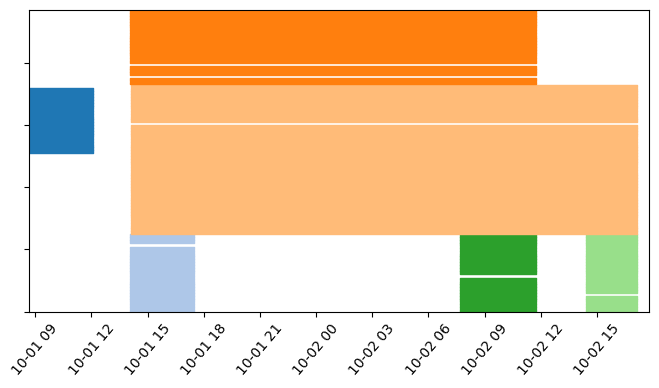

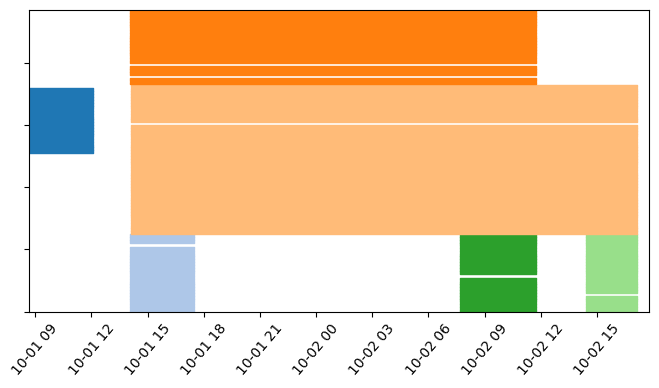

In [38]:

com_to_plot = filter_communities(persistant_coms_school,duration_min=60*60*2)
tn.plot_longitudinal(tn.DynGraphIG(),com_to_plot,height=400,to_datetime=True,nodes=ordered_nodes)


### Then communities of less than half an hour

/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


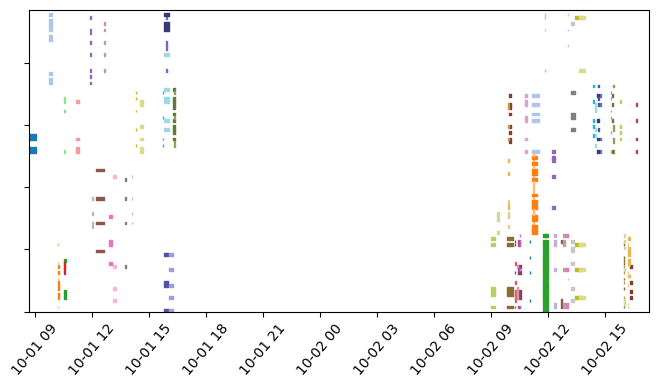

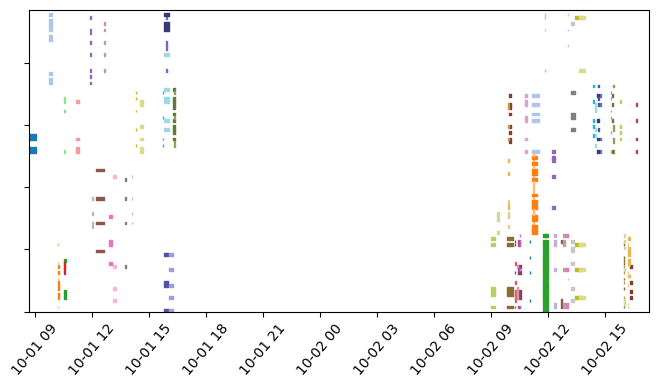

In [39]:
com_to_plot = filter_communities(persistant_coms_school,duration_max=60*30)
#com_to_plot = com_to_plot.slice(1254386420,1254410770)
tn.plot_longitudinal(tn.DynGraphIG(),com_to_plot,height=400,to_datetime=True,nodes=ordered_nodes)

### Finally, remaining communities

/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


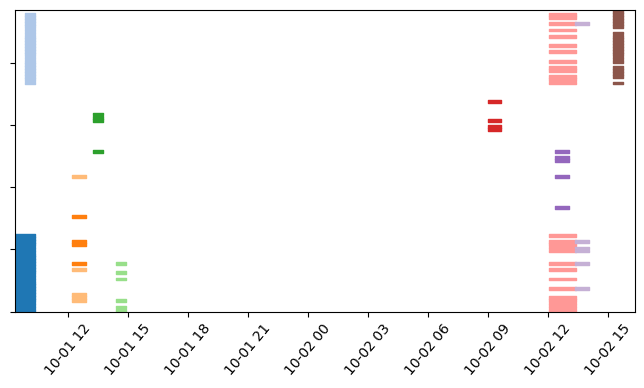

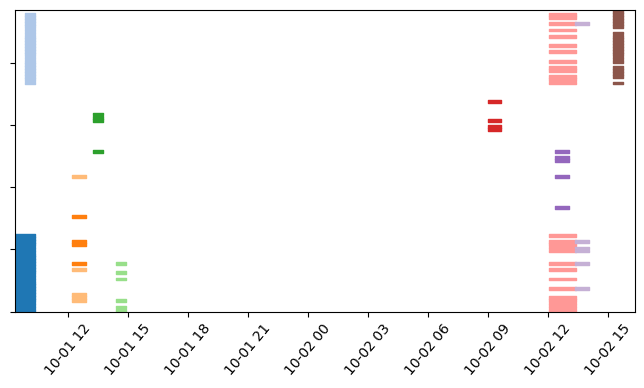

In [40]:
com_to_plot = filter_communities(persistant_coms_school,duration_min=60*30,duration_max=60*60*2)
#com_to_plot = com_to_plot.slice(1254386420,1254410770)
tn.plot_longitudinal(tn.DynGraphIG(),com_to_plot,height=400,to_datetime=True,nodes=ordered_nodes)